# menggunakan pengambil satu sampel tiap kelas


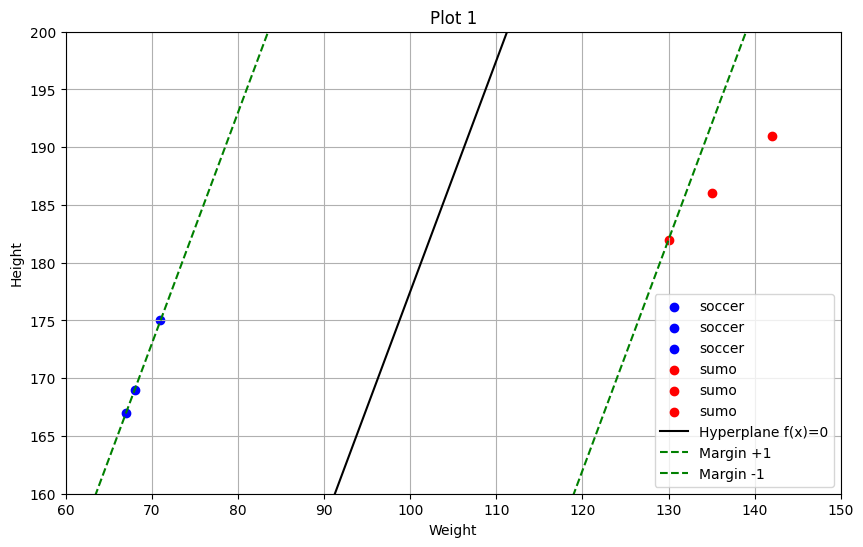

w1 = -0.0360, w2 = 0.0180, b = 0.4054


In [7]:
import numpy as np
import matplotlib.pyplot as plt

# --------------------------
# 1. Dataset
# --------------------------
X = np.array([
    [67, 167],  # soccer (label 1)
    [68, 169],  # soccer
    [71, 175],  # soccer
    [142, 191], # sumo (label -1)
    [135, 186], # sumo
    [130, 182]  # sumo
])
y = np.array([1, 1, 1, -1, -1, -1])

# --------------------------
# 2. Hitung w1 berdasarkan selisih titik sekelas
# --------------------------
x_soc1 = X[2]  # [71, 175]
x_soc2 = X[0]  # [67, 167]

delta_w1 = x_soc1[0] - x_soc2[0]  # 71 - 67 = 4
delta_w2 = x_soc1[1] - x_soc2[1]  # 175 - 167 = 8

# Rumus: delta_w1 * w1 + delta_w2 * w2 = 0 → w1 = -delta_w2 / delta_w1 * w2
w1_ratio = -delta_w2 / delta_w1  # w1 = -2w2

# --------------------------
# 3. Substitusi ke constraint: ambil 1 dari tiap kelas
# --------------------------
x_pos = X[2]  # [71, 175], label = 1
x_neg = X[5]  # [130, 182], label = -1

# Buat dua persamaan dari constraint y(w·x + b) = ±1
# Dengan substitusi w1 = w1_ratio * w2

# Persamaan 1: w1*x1 + w2*x2 + b = 1 → (w1_ratio*w2)*x1 + w2*x2 + b = 1
# Persamaan 2: (w1_ratio*w2)*x1_neg + w2*x2_neg + b = -1

A1 = w1_ratio * x_pos[0] + x_pos[1]
A2 = w1_ratio * x_neg[0] + x_neg[1]

# Persamaan:
# A1 * w2 + b = 1
# A2 * w2 + b = -1

# Kurangi persamaan untuk mengeliminasi b:
# (A1 - A2) * w2 = 2 → w2 = 2 / (A1 - A2)
w2 = 2 / (A1 - A2)

# Hitung w1 dan b dari w2
w1 = w1_ratio * w2
b = 1 - (A1 * w2)

# --------------------------
# 4. Hitung margin: gunakan rumus hyperplane dan garis margin
# --------------------------
def hyperplane(x):
    return -(w1 * x + b) / w2

def margin_plus(x):
    return -(w1 * x + b - 1) / w2

def margin_minus(x):
    return -(w1 * x + b + 1) / w2

# --------------------------
# 5. Plot semuanya
# --------------------------
x_vals = np.linspace(60, 150, 200)

plt.figure(figsize=(10, 6))

# Plot data
for xi, label in zip(X, y):
    plt.scatter(xi[0], xi[1], c='blue' if label == 1 else 'red', label='soccer' if label == 1 else 'sumo')

# Plot hyperplane dan margin
plt.plot(x_vals, hyperplane(x_vals), 'k-', label='Hyperplane f(x)=0')
plt.plot(x_vals, margin_plus(x_vals), 'g--', label='Margin +1')
plt.plot(x_vals, margin_minus(x_vals), 'g--', label='Margin -1')

# Tambahan gaya
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('Plot 1')
plt.legend(loc='lower right')
plt.grid(True)
plt.xlim(60, 150)
plt.ylim(160, 200)
plt.show()

# --------------------------
# 6. Tampilkan parameter model
# --------------------------
print(f"w1 = {w1:.4f}, w2 = {w2:.4f}, b = {b:.4f}")


# Coba menggunakan library

w1 = -0.0334, w2 = -0.0040, b = 4.0674


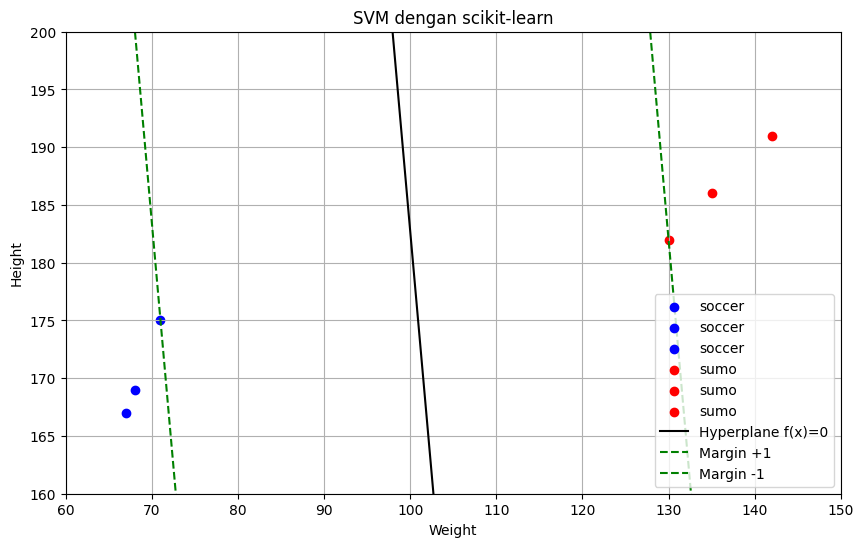

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# --------------------------
# 1. Dataset
# --------------------------
X = np.array([
    [67, 167],  # soccer
    [68, 169],  # soccer
    [71, 175],  # soccer
    [142, 191], # sumo
    [135, 186], # sumo
    [130, 182]  # sumo
])
y = np.array([1, 1, 1, -1, -1, -1])

# --------------------------
# 2. Train model SVM Linear
# --------------------------
model = SVC(kernel='linear', C=1e10)  # C besar → hard margin
model.fit(X, y)

w = model.coef_[0]
b = model.intercept_[0]

print(f"w1 = {w[0]:.4f}, w2 = {w[1]:.4f}, b = {b:.4f}")

# --------------------------
# 3. Buat fungsi hyperplane
# --------------------------
def hyperplane(x):
    return -(w[0] * x + b) / w[1]

def margin_plus(x):
    return -(w[0] * x + b - 1) / w[1]

def margin_minus(x):
    return -(w[0] * x + b + 1) / w[1]

# --------------------------
# 4. Plot
# --------------------------
x_vals = np.linspace(60, 150, 200)

plt.figure(figsize=(10, 6))

# Plot data
for xi, label in zip(X, y):
    plt.scatter(xi[0], xi[1], c='blue' if label == 1 else 'red', label='soccer' if label == 1 else 'sumo')

# Plot hyperplane dan margin
plt.plot(x_vals, hyperplane(x_vals), 'k-', label='Hyperplane f(x)=0')
plt.plot(x_vals, margin_plus(x_vals), 'g--', label='Margin +1')
plt.plot(x_vals, margin_minus(x_vals), 'g--', label='Margin -1')

# Tambahan gaya
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('SVM dengan scikit-learn')
plt.legend(loc='lower right')
plt.grid(True)
plt.xlim(60, 150)
plt.ylim(160, 200)
plt.show()


# Hasil from scratch

Best found parameters (from scratch):
w1 = -0.0384, w2 = -0.0020, b = 4.2424
Minimized ||w||^2 = 0.001477


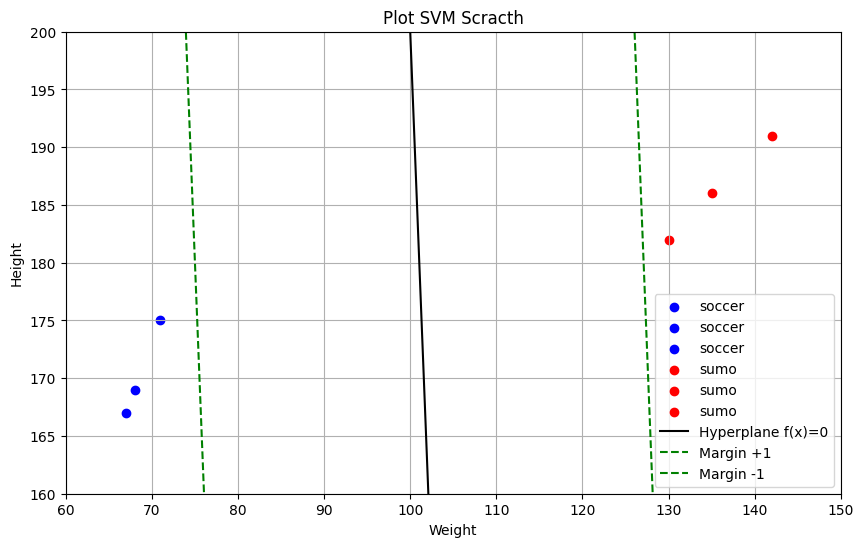

In [9]:
import numpy as np

# --------------------------
# 1. Dataset
# --------------------------
X = np.array([
    [67, 167],  # soccer (label 1)
    [68, 169],  # soccer
    [71, 175],  # soccer
    [142, 191], # sumo (label -1)
    [135, 186], # sumo
    [130, 182]  # sumo
])
y = np.array([1, 1, 1, -1, -1, -1])

# --------------------------
# 2. Grid search param
# --------------------------
w_range = np.linspace(-0.2, 0.2, 100) 
b_range = np.linspace(-20, 20, 100) 

best_params = None
min_norm = float('inf')

# --------------------------
# 3. Brute-force search
# --------------------------
for w1 in w_range:
    for w2 in w_range:
        for b in b_range:
            all_satisfy = True
            for i in range(len(X)):
                x_i = X[i]
                y_i = y[i]
                result = y_i * (w1 * x_i[0] + w2 * x_i[1] + b)
                if result < 1:
                    all_satisfy = False
                    break
            if all_satisfy:
                norm = w1**2 + w2**2
                if norm < min_norm:
                    min_norm = norm
                    best_params = (w1, w2, b)

# --------------------------
# 4. Tampilkan hasil
# --------------------------
if best_params:
    w1, w2, b = best_params
    print(f"Best found parameters (from scratch):")
    print(f"w1 = {w1:.4f}, w2 = {w2:.4f}, b = {b:.4f}")
    print(f"Minimized ||w||^2 = {min_norm:.6f}")
else:
    print("Tidak ditemukan kombinasi yang memenuhi semua constraint.")

def hyperplane(x):
    return -(w1 * x + b) / w2

def margin_plus(x):
    return -(w1 * x + b - 1) / w2

def margin_minus(x):
    return -(w1 * x + b + 1) / w2

# --------------------------
# 5. Plot semuanya
# --------------------------
x_vals = np.linspace(60, 150, 200)

plt.figure(figsize=(10, 6))

# Plot data
for xi, label in zip(X, y):
    plt.scatter(xi[0], xi[1], c='blue' if label == 1 else 'red', label='soccer' if label == 1 else 'sumo')

# Plot hyperplane dan margin
plt.plot(x_vals, hyperplane(x_vals), 'k-', label='Hyperplane f(x)=0')
plt.plot(x_vals, margin_plus(x_vals), 'g--', label='Margin +1')
plt.plot(x_vals, margin_minus(x_vals), 'g--', label='Margin -1')

# Tambahan gaya
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('Plot SVM Scracth')
plt.legend(loc='lower right')
plt.grid(True)
plt.xlim(60, 150)
plt.ylim(160, 200)
plt.show()

